<a href="https://colab.research.google.com/github/sreeja-01p/FMML/blob/main/Non_Linear_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Nikunj Nawal
```



## SVMs Recap:

![SVM](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

SVMs are an iterative approach of trying to find the optimal hyperplane that divides the multidimentional space into different classes present in the dataset.


**Hyperplanes:** These are the decision planes that separate the objects of classes that we are trying to classify.

**Support Vectors** : Support vectors are the points from dataset that are closest to the hyperplane that divides the dataset.

**Margin**:  The gap between the closest support vectors from the different class along the direction perpendicular to the hyperplane. Simply put, it is the sum of perpendicular distance of the support vector of each class to the hyperplane.

---

In [1]:
# Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

(100, 2) (100,)


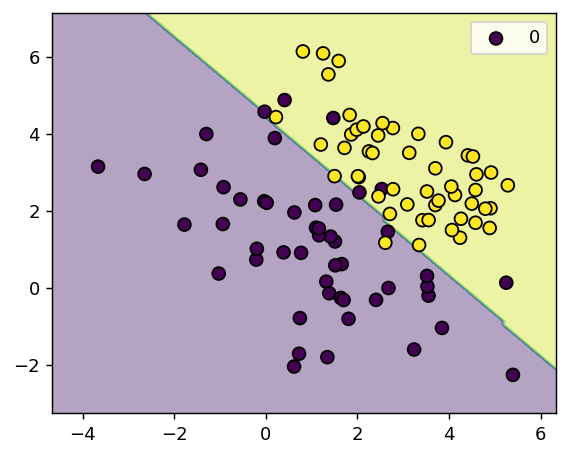

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


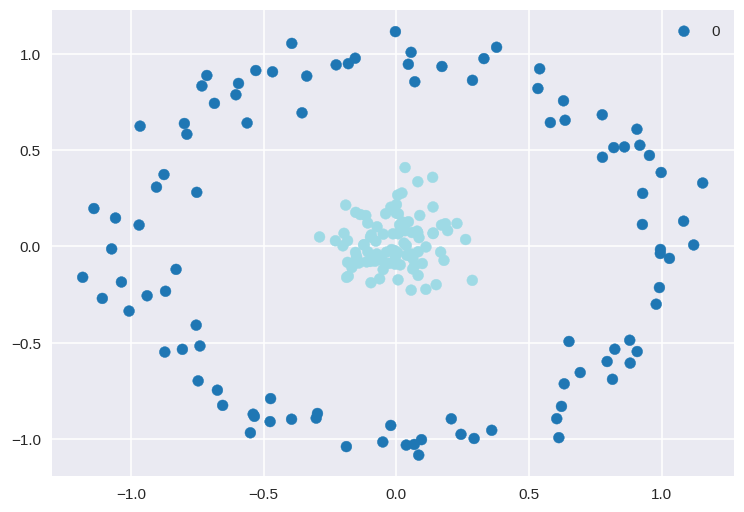

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

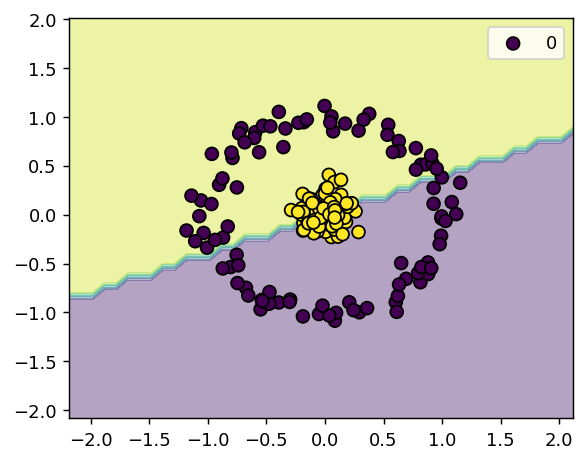

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

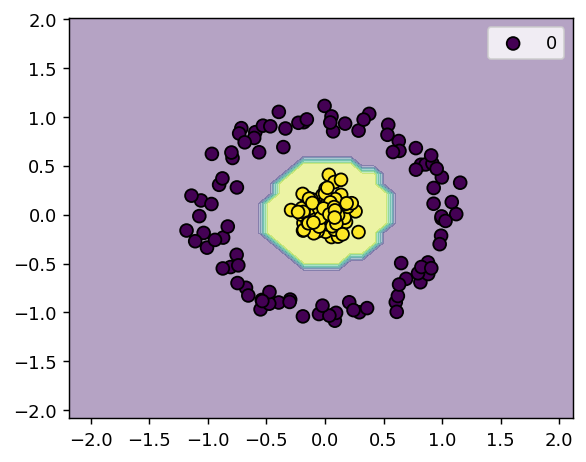

In [8]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [9]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.


Tasks:

Task-1
Try to run the same experiment after filtering different features, 2 at a time.

Task-2
Use different kinds of kernels for the SVM and plot it for Iris dataset -
1. linear
2. poly
3. rbf
4. sigmoid
5. precomputed

Learning Tasks:
Learn about SVM types, support vectors and hyperplanes.

**Answers:**

Task 1

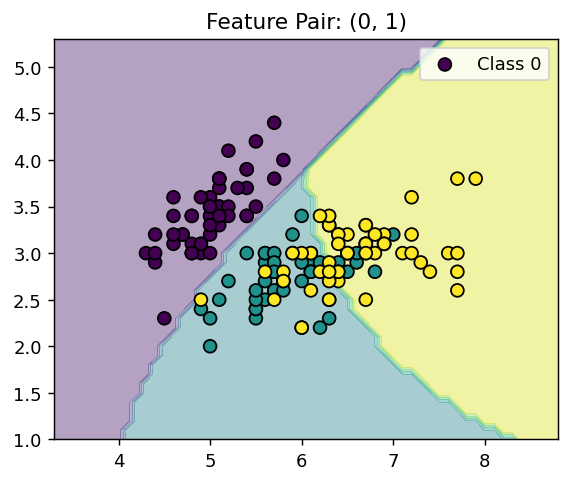

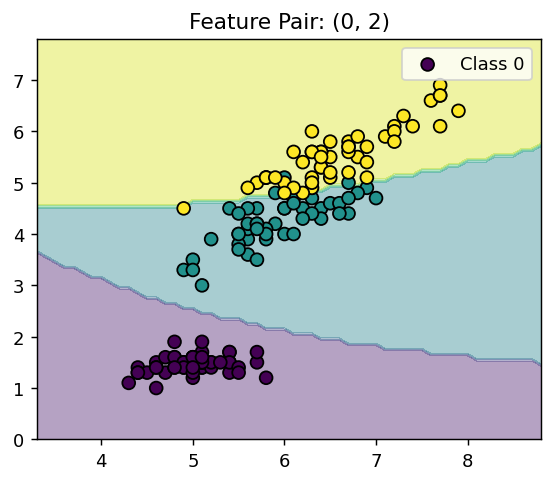

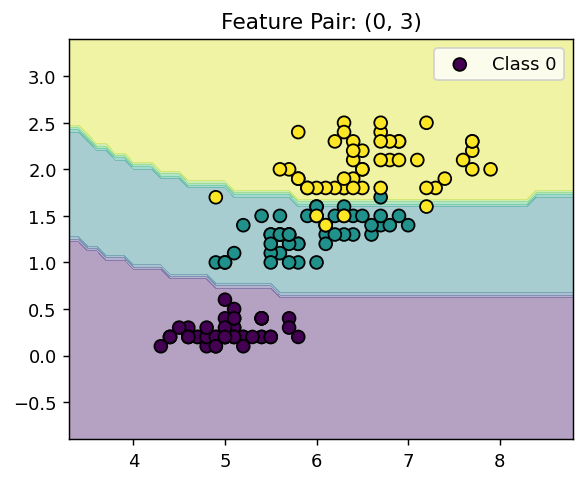

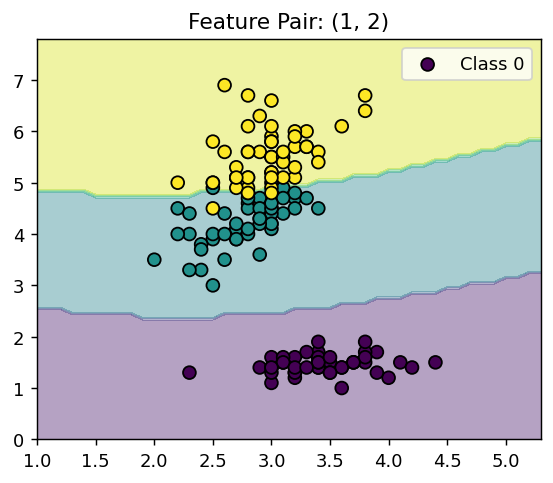

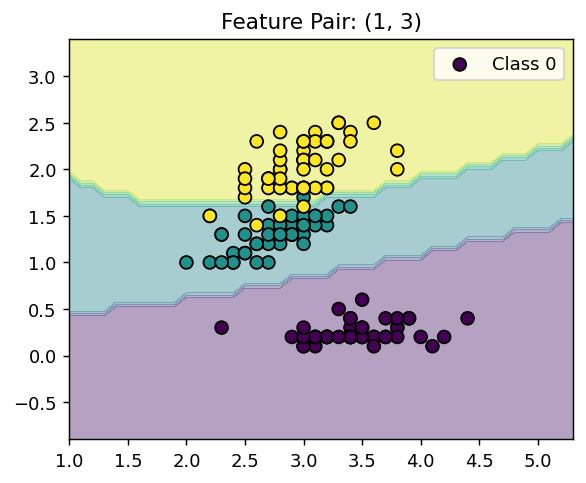

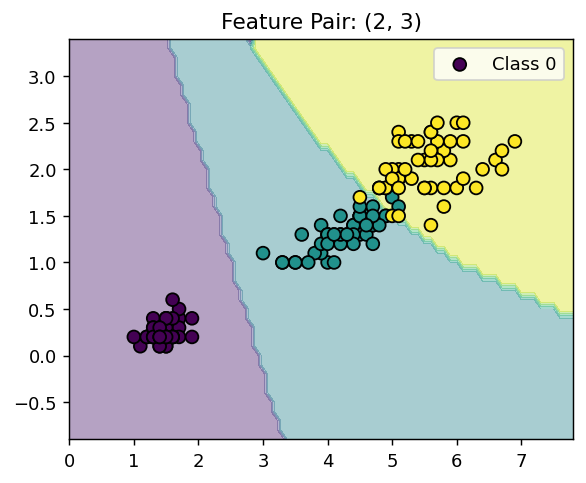

In [12]:
from itertools import combinations

iris = load_iris()
X, y = iris.data, iris.target

feature_combinations = list(combinations(range(X.shape[1]), 2))

for pair in feature_combinations:
    #Select only the chosen pair of features
    X_pair = X[:, pair]

    #Train the SVM with a chosen kernel (e.g., 'poly')
    clf = svm.SVC(kernel='poly')
    clf.fit(X_pair, y)

    def plotDecisionBoundaryFixed(X, y, clf):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        y_pred = y_pred.reshape(xx.shape)
        plt.figure(figsize=(5, 4))
        plt.contourf(xx, yy, y_pred, alpha=0.4)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
        plt.legend(["Class 0", "Class 1", "Class 2"])
        plt.title(f"Feature Pair: {pair}")
        plt.gcf().set_dpi(130)
        plt.show()

    plotDecisionBoundaryFixed(X_pair, y, clf)

Task 2

Kernel: linear, Accuracy: 0.763


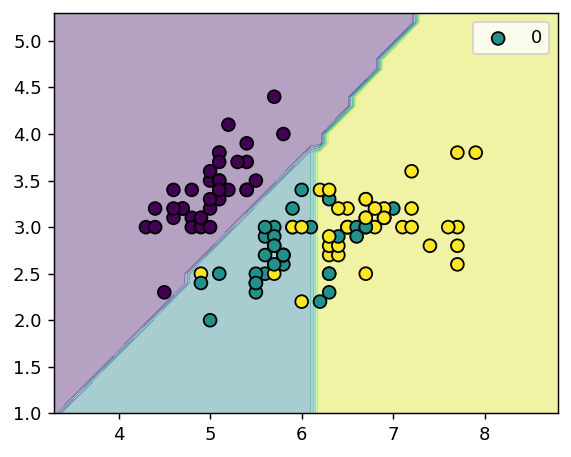

Kernel: poly, Accuracy: 0.763


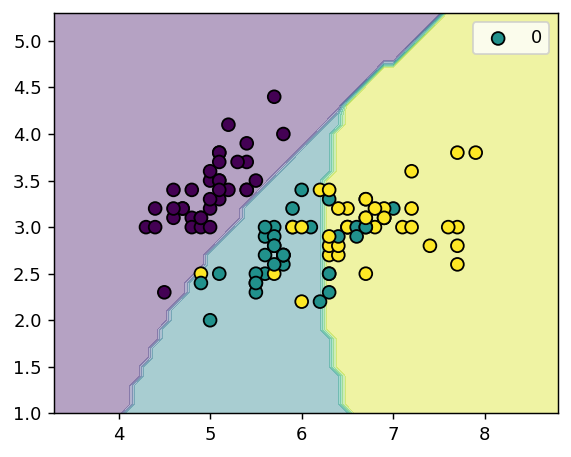

Kernel: rbf, Accuracy: 0.763


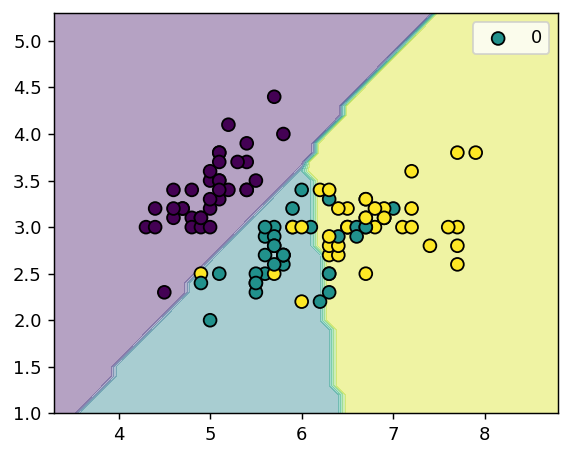

Kernel: sigmoid, Accuracy: 0.237


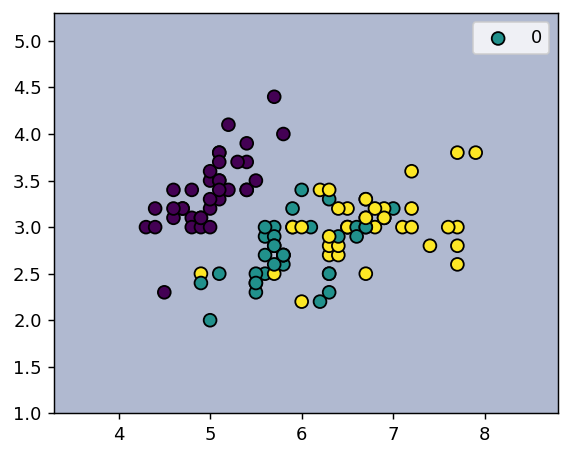

Precomputed Kernel Accuracy: 0.974


In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train[:, :2], y_train)  #Use the first 2 features
    y_pred = clf.predict(X_test[:, :2])
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    plotDecisionBoundary(X_train[:, :2], y_train, [0, 1], clf)

#Precomputed kernel requires a kernel matrix
from sklearn.metrics.pairwise import linear_kernel
K_train = linear_kernel(X_train, X_train)
K_test = linear_kernel(X_test, X_train)
clf = svm.SVC(kernel='precomputed')
clf.fit(K_train, y_train)
y_pred = clf.predict(K_test)
print(f"Precomputed Kernel Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Learning task

1.Types of SVM
- Linear SVM:Used for linearly separable data. Finds a hyperplane that maximizes the margin between classes.Works in the original feature space.
- Non-Linear SVM:Used when data is not linearly separable. Applies the kernel trick to project data into a higher-dimensional space where it becomes linearly separable.Common kernels: rbf, polynomial, sigmoid.
- SVM for Regression (SVR):A variant called Support Vector Regression.
Instead of separating data points, it finds a hyperplane (or line) that fits within a margin of tolerance to predict continuous values.
- SVM for Multi-Class Classification:SVM inherently handles binary classification, but methods like "one-vs-one" or "one-vs-rest" extend it to multi-class problems.
Example: Iris dataset with 3 classes.
- Hard-Margin SVM:Assumes data is perfectly separable. No tolerance for misclassification. Can lead to overfitting in noisy data.
- Soft-Margin SVM:Allows some misclassification to handle noise and overlapping classes.Controlled by a parameter (C) that balances margin width and misclassification tolerance.
2.
Support vectors are the closest data points to the hyperplane from each class.
They "support" the hyperplane by defining its position and orientation.
IOnly these points influence the position of the hyperplane.
If you remove non-support vectors, the hyperplane remains unchanged.
Example: In a 2D space, support vectors are typically the points lying on the margin boundaries.

3.
A hyperplane is a decision boundary that separates different classes in the feature space.In 2D, it's a line. In 3D, it's a plane. In higher dimensions, it's a  hyperplane.

A hyperplane can be in the form: w⋅x+b=0,

where:
w is the weight vector (defines orientation) and
b is the bias term (defines position)

Properties:
Optimal Hyperplane: Maximizes the margin (distance to the nearest support vectors).
Margin: Distance between the hyperplane and the nearest support vector from either class. Larger margin = better generalization.
